In [46]:
import pandas as pd
import numpy as np
import os, json, csv, time
from collections import Counter, defaultdict
import matplotlib.pyplot as plt

In [152]:
class KMeans_custom:
    def __init__(self, k, max_iter = 100, verbose = False,random_state = None):
        self.k = k
        self.verbose = verbose
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.clus_map = None
        
        
    def _distance(self, a,b):
            '''
            The distance in k-means clustering is only Euclidean
            '''
            return np.sqrt(np.sum((a-b)**2))
       
    
    def _initial_clusters(self, X):
        '''
        Picks k points randomly from dataset as initial centroids.
        We can also use kmeans++ technique to come. 
        '''
        indices = range(X.shape[0])
        if self.random_state:
            np.random.seed(self.random_state)

        chosen_indices = np.random.choice(indices, self.k)
        return X[chosen_indices]
    
    def _get_centroid(self, X,clus_map):
        
        centroids = []
        for cluster_id in clus_map:
            indices = clus_map[cluster_id]
            Xcluster = X[np.array(indices)]
            centroid = np.mean(Xcluster, axis = 0)
            centroids.append(centroid)
        return centroids
    
    def _cluster_assign(self, X, centroids):
        clus_map = defaultdict(list)
        for index, point in enumerate(X):
            dists = [self._distance(c,point) for c in centroids]
            assigned_cluster_id = np.argmin(dists)
            clus_map[assigned_cluster_id].append(index)
        return clus_map
    
    def fit(self, X):
         
        prev_clus_map= None
        for iter_num in range(self.max_iter):
            if iter_num == 0:
                centroids = self._initial_clusters(X)
            else:
                centroids = self._get_centroid(X,clus_map)
            
            clus_map = self._cluster_assign(X, centroids)
            if clus_map == prev_clus_map:
                if self.verbose: print ("Finishing early in " + str(iter_num) + " steps")
                break
            
            prev_clus_map = clus_map
            
        
        self.centroids = centroids
        self.clus_map = clus_map
        return clus_map
    
    def predict(self, point):
        '''
        Predict which cluster an new point belongs to
        '''
        dists = [self._distance(c,point) for c in self.centroids]
        return np.argmin(dists)
    
    def sse(self, X):
        c = np.mean(X, axis = 0)
        total_sse = sum([self._distance(c,point) for point in X])
        
        sse_numerator = 0
        for cluster_id in range(self.k):
            c = self.centroids[cluster_id]
            points_cluster = X[np.array(self.clus_map[cluster_id])]
            sse = sum([self._distance(c,point) for point in points_cluster])
            sse_numerator += sse
        
        return sse_numerator / total_sse
        
        
X0 = np.random.randn(100,2)
X1 = X0 + 3
X2 = X0 - 3
X3 = X0 + 5
X = np.vstack((X0, X1, X2, X3 ))

# Scale the varibles before kmeans 
X1 = (X-np.min(X,axis =0))/ (np.max(X, axis =0) - np.min(X, axis = 0)) # Min-Max Scaler
X2 = (X - np.mean(X, axis =0))/np.std(X, axis =0) # Standard Scaler

#X = np.random.randn(100,2)

kmeans = KMeans_custom(k = 4, verbose = True, random_state = 124)
clus_map = kmeans.fit(X2)
print (clus_map)
print (kmeans.centroids)
print (kmeans.predict(np.array([0,0])))

Finishing early in 12 steps
defaultdict(<class 'list'>, {0: [0, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299], 1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 210], 2: [10, 101, 102, 103, 104, 105, 106, 107,

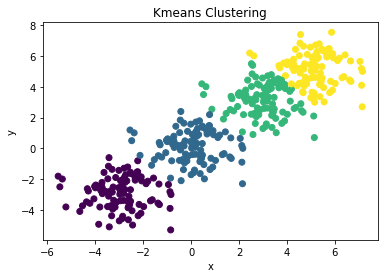

In [153]:
# Plotting of cluster points
clus_map_reverse = {}
for clusterId, indices in clus_map.items():
    for index in indices:
        clus_map_reverse[index] = clusterId

c = [clus_map_reverse[i] for i in range(X.shape[0])]

plt.scatter(X[:,0], X[:,1],c = c)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kmeans Clustering')
#plt.legend(loc = 'best')
plt.show()

Finishing early in 2 steps
Finishing early in 17 steps
Finishing early in 9 steps
Finishing early in 8 steps
Finishing early in 9 steps
Finishing early in 9 steps
Finishing early in 18 steps
Finishing early in 18 steps


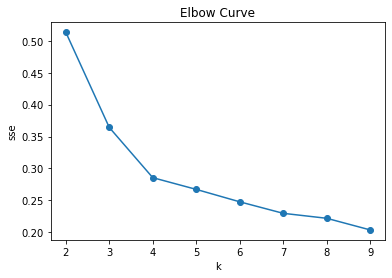

In [133]:
# Plotting of Elblow Curve
sse_y = []; sse_x =[]
for k in range(2,10):
    kmeans = KMeans_custom(k = k, verbose = True, random_state = 124)
    clus_map = kmeans.fit(X)
    sse_x.append(k)
    sse_y.append(kmeans.sse(X))

plt.plot(sse_x, sse_y, 'o-')
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow Curve')
plt.show()

In [127]:
plt.scatter?

In [139]:
X = 5*np.random.randn(10,3)+ 100
X

array([[ 99.99999457, 102.14502042,  93.65965024],
       [104.26907318, 104.99372273, 101.87952214],
       [ 98.08239581, 100.27746285,  89.6495795 ],
       [104.30452061,  99.45806565, 102.29355191],
       [101.88032511,  95.16816273, 100.30467336],
       [ 99.46319435, 110.2686266 ,  90.11596903],
       [105.91885118, 103.14277311, 105.7696155 ],
       [103.34866347, 105.68903478,  97.30124635],
       [104.54846437, 100.30923113, 109.57735626],
       [111.22557628, 107.0690386 ,  97.7687029 ]])

In [143]:
Y = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
Y

array([[-0.92341122, -0.17166511, -0.84178766],
       [ 0.26968269,  0.51993061,  0.49598044],
       [-1.45932907, -0.62506272, -1.49441885],
       [ 0.2795893 , -0.82399246,  0.56336298],
       [-0.39790886, -1.86547668,  0.23967688],
       [-1.07343261,  1.80054913, -1.41851486],
       [ 0.73075175,  0.07056501,  1.12908554],
       [ 0.01245266,  0.68873549, -0.24912501],
       [ 0.34776509, -0.61735016,  1.74878791],
       [ 2.21384026,  1.02376689, -0.17304737]])

In [146]:
X

array([[ 99.99999457, 102.14502042,  93.65965024],
       [104.26907318, 104.99372273, 101.87952214],
       [ 98.08239581, 100.27746285,  89.6495795 ],
       [104.30452061,  99.45806565, 102.29355191],
       [101.88032511,  95.16816273, 100.30467336],
       [ 99.46319435, 110.2686266 ,  90.11596903],
       [105.91885118, 103.14277311, 105.7696155 ],
       [103.34866347, 105.68903478,  97.30124635],
       [104.54846437, 100.30923113, 109.57735626],
       [111.22557628, 107.0690386 ,  97.7687029 ]])

In [149]:
(X - np.min(X, axis =0 ))/(np.max(X, axis =0) - np.min(X, axis = 0))

array([[0.14590066, 0.46202936, 0.20123021],
       [0.47071387, 0.65067935, 0.61371335],
       [0.        , 0.33835385, 0.        ],
       [0.47341089, 0.2840908 , 0.63448987],
       [0.28896577, 0.        , 0.53468553],
       [0.10505817, 1.        , 0.02340399],
       [0.59623737, 0.52810367, 0.80892295],
       [0.40068442, 0.69672509, 0.38396992],
       [0.49197137, 0.34045765, 1.        ],
       [1.        , 0.78811326, 0.40742746]])